In [ ]:
!pip install KModes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering

In [ ]:

df = pd.read_csv('HealthRisk_Indicator_Dataset.csv')

In [ ]:
df.head()

,PatientID,first_name,last_name,Country Code,Weight(lb),Gender,Medical Condition,Age,Blood Group,Blood Pressure,Past Medications,Food/Nutrition,Sleep hours per day,Work hours per day,Mental Health,Family History,Previous surgeries,Physical Activity,Lifestyle,Health Risk
0,7QF8HY7AN03,Marya,Bradock,CO,119,Female,migraine,85,B+,140/90,SyResp,Moderately Healthy,3,3,Stressful,True,True,Lightly Active,Former smoker,High Risk
1,4PH6R91NW76,Krystalle,Shubotham,CM,98,Female,sprained ankle,66,A-,110/70,Supersmile,Healthy Diet,5,7,Nervous,False,False,Lightly Active,NaN,High to Moderate Risk
2,2PW1UE9YD24,Pen,Spennock,PH,86,Female,headache,23,B-,128/84,Hydrocodone Bitartrate and Acetaminophen,Healthy Diet,5,11,Nervous,True,True,Lightly Active,Social drinker,Moderate Risk
3,6PU0XR5VY14,Hubey,Adamowicz,CN,112,Male,stomach flu,48,B+,145/95,Imipramine Pamoate,Poor Diet,6,10,Stressful,False,False,Sedentary,Regular smoker,High Risk
4,7G92Y38YE04,Vally,Lindenstrauss,US,94,Female,food poisoning,28,O+,110/70,ibuprofen,Moderately Healthy,6,8,Peaceful,True,False,Very Active,NaN,Low Risk


In [ ]:
df.dtypes

PatientID              object
first_name             object
last_name              object
Country Code           object
Weight(lb)              int64
Gender                 object
Medical Condition      object
Age                     int64
Blood Group            object
Blood Pressure         object
Past Medications       object
Food/Nutrition         object
Sleep hours per day     int64
Work hours per day      int64
Mental Health          object
Family History           bool
Previous surgeries       bool
Physical Activity      object
Lifestyle              object
Health Risk            object
dtype: object

In [ ]:
df.describe()

,Weight(lb),Age,Sleep hours per day,Work hours per day
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,99.859000,53.549000,6.590000,8.781000
std,9.978812,22.685375,2.077069,3.310891
min,67.000000,13.000000,3.000000,3.000000
25%,93.000000,34.000000,5.000000,7.000000
50%,100.000000,54.000000,6.000000,10.000000
75%,106.000000,74.000000,8.000000,11.000000
max,135.000000,91.000000,12.000000,16.000000


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
df['Health Risk'].value_counts()

Health Risk
High to Moderate Risk    328
Low Risk                 302
Moderate Risk            188
High Risk                182
Name: count, dtype: int64

In [ ]:
df.groupby('Country Code')['Age'].mean().sort_values(ascending=False)

Country Code
GE    89.0
WF    88.0
TD    88.0
DK    87.0
GA    86.0
      ... 
TW    19.0
IQ    18.0
LR    17.0
CI    14.0
DJ    14.0
Name: Age, Length: 153, dtype: float64

In [ ]:
df.groupby('Country Code')['Weight(lb)'].mean().sort_values(ascending=False)

Country Code
SY    116.000000
GW    115.000000
GR    112.000000
MQ    112.000000
MR    111.333333
         ...    
SL     84.000000
DJ     84.000000
PT     82.000000
RS     78.000000
SX     78.000000
Name: Weight(lb), Length: 153, dtype: float64

In [ ]:
df.columns

Index(['PatientID', 'first_name', 'last_name', 'Country Code', 'Weight(lb)',
       'Gender', 'Medical Condition', 'Age', 'Blood Group', 'Blood Pressure',
       'Past Medications', 'Food/Nutrition', 'Sleep hours per day',
       'Work hours per day', 'Mental Health', 'Family History',
       'Previous surgeries ', 'Physical Activity', 'Lifestyle', 'Health Risk'],
      dtype='object')

In [ ]:
# prompt: dataframe group by

df_sleep = df.groupby('Country Code')['Sleep hours per day'].mean().nlargest(10).reset_index().sort_values(by='Sleep hours per day', ascending=False)
df_work = df.groupby('Country Code')['Work hours per day'].mean().nlargest(10).reset_index().sort_values(by='Work hours per day', ascending=False)

df_work.head()

,Country Code,Work hours per day
0,AS,16.0
1,HU,16.0
2,TO,16.0
3,BE,14.0
4,CI,14.0


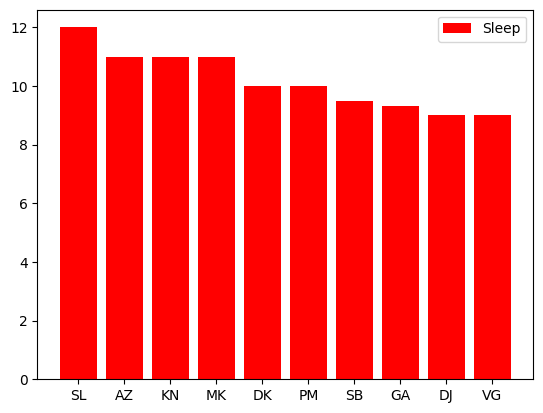

In [ ]:
plt.bar(df_sleep['Country Code'],df_sleep['Sleep hours per day'],  color='r', label='Sleep')

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [ ]:

# plt.bar( df_work['Country Code'], df_work['Work hours per day'], color='g', label='Work')

# Country wise plotting
df.groupby('Country Code', as_index=True)[['Work hours per day', 'Sleep hours per day']].mean().sort_values(by= 'Sleep hours per day', ascending=False)

,Work hours per day,Sleep hours per day
Country Code,,
SL,9.0,12.0
AZ,3.0,11.0
KN,7.0,11.0
MK,7.0,11.0
DK,8.0,10.0
...,...,...
AW,7.0,4.0
GE,7.0,3.0
DO,3.0,3.0


<Axes: xlabel='Medical Condition'>

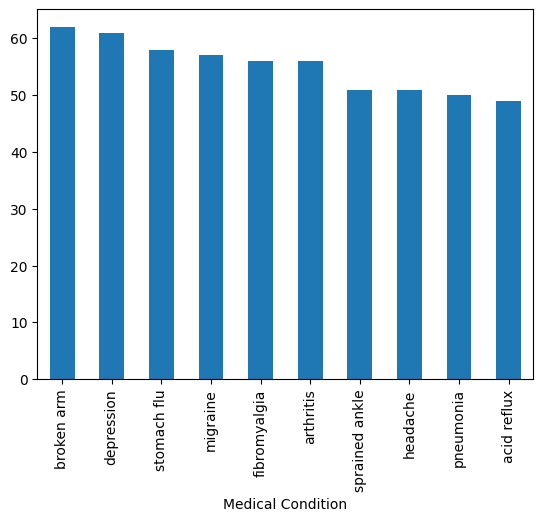

In [ ]:
# Medical condition analysis

df["Medical Condition"].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar')

<Axes: xlabel='Country Code,Mental Health'>

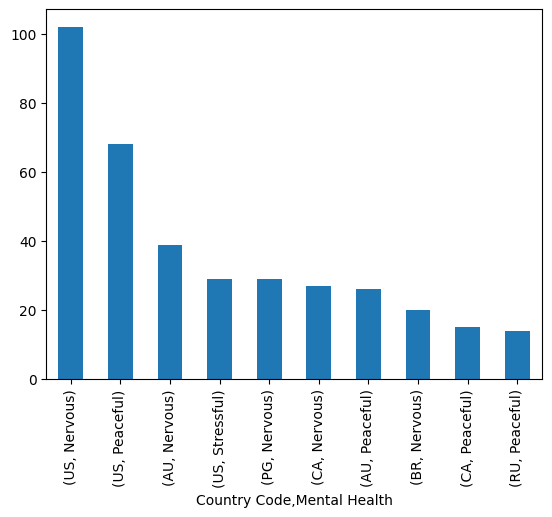

In [ ]:
# Mental Health

df.groupby("Country Code")["Mental Health"].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar')

In [ ]:
# Outliers to be treated?
# to be done later

<Axes: >

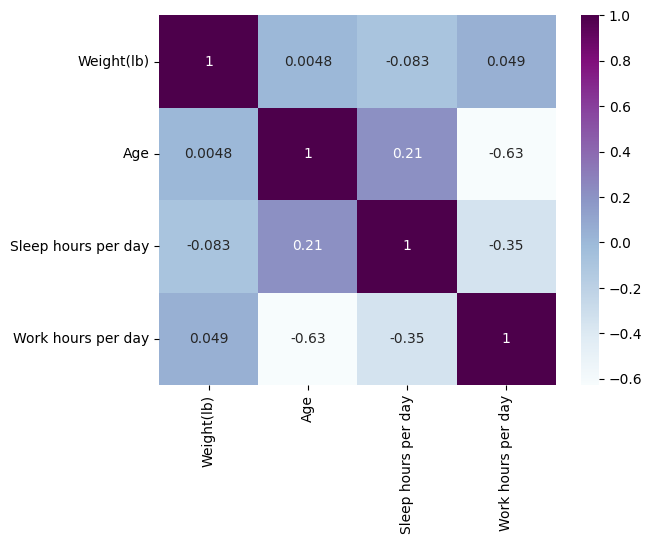

In [ ]:
# correlation map to check multi collinear features

corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')

In [ ]:
# Preprocessing Steps

In [ ]:
df['Food/Nutrition'].value_counts()

Food/Nutrition
Poor Diet             393
Healthy Diet          387
Moderately Healthy    220
Name: count, dtype: int64

In [ ]:
def preprocessing(data):
  # #Blood pressure
  data[['bp_systolic', 'bp_diastolic']] = (data['Blood Pressure'].str.split('/', expand=True).astype(int) )
  data['High_BP'] = data['bp_systolic'].apply(lambda x: 1 if x >=140 else 0)
  data.drop('Blood Pressure', axis=1, inplace=True)

  # #Convert categorical features to Numerical
  le = LabelEncoder()
  leList = []

  for column in cat_columns:

    if(column in ['Health Risk', 'Mental Health', 'Food/Nutrition']):
      mentalHealth_mapping = {'Peaceful': 0, 'Nervous': 1, 'Stressful': 2}
      nutrition_mapping = {'Poor Diet': 0, 'Moderately Healthy': 1, 'Healthy Diet': 2}

      data['Mental Health_enc'] = data['Mental Health'].map(mentalHealth_mapping)
      data['Food/Nutrition_enc'] = data['Food/Nutrition'].map(nutrition_mapping)
    elif(column not in ['PatientID', 'first_name', 'last_name', 'Blood Pressure', 'Medical Condition', 'Past Medications']):
      new_column = column + "_le"
      data[new_column] = le.fit_transform(data[column])
      le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
      leList.append(le_name_mapping)
      # print(le_name_mapping)
      data.drop(column, axis=1, inplace=True)

  for column in bool_columns:
    data[column] = data[column].astype(int)

  # Apply Scaler to scale the data
  st = StandardScaler()

  data.drop(["PatientID", "first_name", "last_name", "Medical Condition", "Past Medications"], axis=1, inplace=True)

  return (data, leList)

In [ ]:

cat_columns = df.select_dtypes(include=['object']).columns
print("category column: " + cat_columns)
bool_columns = df.select_dtypes(include=['bool']).columns
print("Boolean column: " + bool_columns)
df_copy = df.copy()
df_copy.head()
# (df_prep, leList) = preprocessing(df_copy)


Index(['category column: PatientID', 'category column: first_name',
       'category column: last_name', 'category column: Country Code',
       'category column: Gender', 'category column: Medical Condition',
       'category column: Blood Group', 'category column: Blood Pressure',
       'category column: Past Medications', 'category column: Food/Nutrition',
       'category column: Mental Health', 'category column: Physical Activity',
       'category column: Lifestyle', 'category column: Health Risk'],
      dtype='object')
Index(['Boolean column: Family History', 'Boolean column: Previous surgeries '], dtype='object')


,PatientID,first_name,last_name,Country Code,Weight(lb),Gender,Medical Condition,Age,Blood Group,Blood Pressure,Past Medications,Food/Nutrition,Sleep hours per day,Work hours per day,Mental Health,Family History,Previous surgeries,Physical Activity,Lifestyle,Health Risk
0,7QF8HY7AN03,Marya,Bradock,CO,119,Female,migraine,85,B+,140/90,SyResp,Moderately Healthy,3,3,Stressful,True,True,Lightly Active,Former smoker,High Risk
1,4PH6R91NW76,Krystalle,Shubotham,CM,98,Female,sprained ankle,66,A-,110/70,Supersmile,Healthy Diet,5,7,Nervous,False,False,Lightly Active,NaN,High to Moderate Risk
2,2PW1UE9YD24,Pen,Spennock,PH,86,Female,headache,23,B-,128/84,Hydrocodone Bitartrate and Acetaminophen,Healthy Diet,5,11,Nervous,True,True,Lightly Active,Social drinker,Moderate Risk
3,6PU0XR5VY14,Hubey,Adamowicz,CN,112,Male,stomach flu,48,B+,145/95,Imipramine Pamoate,Poor Diet,6,10,Stressful,False,False,Sedentary,Regular smoker,High Risk
4,7G92Y38YE04,Vally,Lindenstrauss,US,94,Female,food poisoning,28,O+,110/70,ibuprofen,Moderately Healthy,6,8,Peaceful,True,False,Very Active,NaN,Low Risk


In [ ]:
(df_prep, leList) = preprocessing(df_copy)

In [ ]:
df_prep.head()
df_prep.drop("Food/Nutrition", axis=1, inplace=True)

In [ ]:
leList

[{'AE': 0,
  'AF': 1,
  'AG': 2,
  'AO': 3,
  'AR': 4,
  'AS': 5,
  'AU': 6,
  'AW': 7,
  'AZ': 8,
  'BD': 9,
  'BE': 10,
  'BF': 11,
  'BG': 12,
  'BJ': 13,
  'BL': 14,
  'BO': 15,
  'BR': 16,
  'BS': 17,
  'BW': 18,
  'BY': 19,
  'BZ': 20,
  'CA': 21,
  'CD': 22,
  'CF': 23,
  'CG': 24,
  'CH': 25,
  'CI': 26,
  'CL': 27,
  'CM': 28,
  'CN': 29,
  'CO': 30,
  'CR': 31,
  'CU': 32,
  'CZ': 33,
  'DE': 34,
  'DJ': 35,
  'DK': 36,
  'DO': 37,
  'DZ': 38,
  'EC': 39,
  'ES': 40,
  'ET': 41,
  'FI': 42,
  'FJ': 43,
  'FR': 44,
  'GA': 45,
  'GB': 46,
  'GE': 47,
  'GF': 48,
  'GL': 49,
  'GP': 50,
  'GR': 51,
  'GT': 52,
  'GW': 53,
  'GY': 54,
  'HN': 55,
  'HT': 56,
  'HU': 57,
  'ID': 58,
  'IE': 59,
  'IL': 60,
  'IN': 61,
  'IQ': 62,
  'IR': 63,
  'IS': 64,
  'IT': 65,
  'JP': 66,
  'KE': 67,
  'KI': 68,
  'KN': 69,
  'KR': 70,
  'KY': 71,
  'KZ': 72,
  'LC': 73,
  'LK': 74,
  'LR': 75,
  'LS': 76,
  'LY': 77,
  'MA': 78,
  'MF': 79,
  'MG': 80,
  'MH': 81,
  'MK': 82,
  'ML': 83,
  

In [ ]:
df_prep.head()

,Weight(lb),Age,Food/Nutrition,Sleep hours per day,Work hours per day,Mental Health,Family History,Previous surgeries,Health Risk,bp_systolic,bp_diastolic,High_BP,Country Code_le,Gender_le,Blood Group_le,Physical Activity_le,Lifestyle_le
0,119,85,NaN,3,3,NaN,1,1,High Risk,140,90,1,30,2,4,0,1
1,98,66,NaN,5,7,NaN,0,0,High to Moderate Risk,110,70,0,28,2,1,0,11
2,86,23,NaN,5,11,NaN,1,1,Moderate Risk,128,84,0,104,2,5,0,10
3,112,48,NaN,6,10,NaN,0,0,High Risk,145,95,1,29,5,4,2,8
4,94,28,NaN,6,8,NaN,1,0,Low Risk,110,70,0,140,2,6,3,11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[]

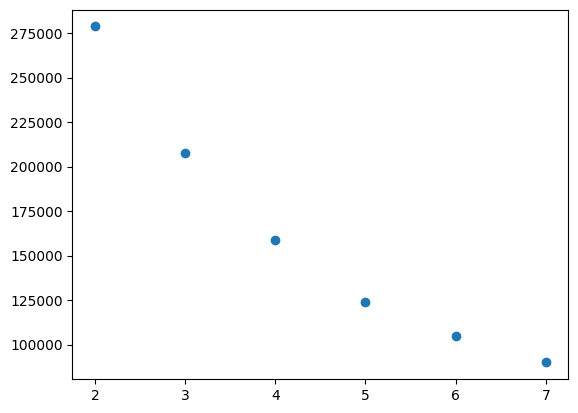

In [ ]:
# def ApplyKMeans(X):
  # #Elbow method

# X = df_prep.drop('Health Risk_le', axis=1)
X = df_prep[['Age', 'Food/Nutrition_enc', 'bp_systolic', 'bp_diastolic', 'Mental Health_enc', 'Physical Activity_le', 'High_BP' ]]
st = StandardScaler()
X_st = st.fit_transform(X)
# .drop(['Health Risk'], axis=1)
elbow = range(2, 8)
sse = []
for e in elbow:
    km = KMeans(n_clusters = e, random_state=33)
    km.fit(X)
    sse.append(km.inertia_)
plt.scatter(elbow, sse)
plt.plot(figsize=(20,20))


In [ ]:
km = KMeans(n_clusters=3) #
km.fit_transform(X)
print(km.labels_)
print(silhouette_score(X, km.labels_))

[1 2 0 2 0 0 2 2 0 1 2 1 0 1 0 0 2 2 2 2 1 2 2 1 2 1 1 2 1 0 1 2 1 2 1 0 1
 2 0 2 0 1 1 1 0 1 0 2 1 0 0 0 0 2 2 0 1 1 2 2 0 2 1 0 1 1 1 0 2 2 0 2 2 0
 0 2 2 0 0 0 2 0 2 1 2 0 1 0 2 1 0 0 2 2 2 2 2 1 0 2 2 1 2 0 2 0 0 1 0 0 1
 2 0 1 0 0 1 0 1 0 2 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 2 2 1 2 0 1 0 2 0 0
 2 0 2 2 0 1 2 1 1 1 2 1 1 1 1 2 0 1 1 2 1 2 2 0 2 1 2 1 1 0 2 0 0 0 2 2 2
 2 0 1 1 1 1 1 1 2 1 1 1 0 0 2 2 0 2 1 1 1 1 1 1 0 1 1 1 2 2 1 2 2 2 2 1 0
 1 1 1 1 2 2 0 1 2 1 1 0 1 2 0 0 1 1 0 0 2 2 1 2 2 0 2 2 1 1 0 2 2 2 2 1 0
 2 0 2 1 0 1 0 0 0 2 1 1 0 2 0 2 2 2 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 2 0 0
 2 2 1 1 2 1 2 1 0 0 1 2 2 1 1 2 2 2 1 1 0 0 1 2 2 2 2 0 2 2 2 2 1 1 1 1 0
 0 1 0 1 2 0 2 2 1 1 1 0 2 0 2 0 2 0 1 1 0 1 1 1 0 2 0 1 0 2 0 0 2 2 1 1 1
 2 1 0 1 1 1 0 1 0 1 0 2 2 0 1 2 2 2 0 0 2 1 2 1 1 0 0 2 0 1 2 1 2 0 0 2 2
 1 2 1 1 0 0 1 0 1 1 2 1 1 1 1 2 1 1 2 0 2 0 0 2 1 0 0 2 0 2 0 2 0 2 0 2 2
 0 1 1 1 2 0 1 0 2 1 1 2 0 1 1 0 0 2 0 0 0 2 2 2 1 1 1 2 2 1 1 1 2 2 1 1 2
 2 2 1 1 2 2 1 0 1 1 1 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_kmeans = df_prep.copy()
df_kmeans.drop("Cluster", axis=1, inplace=True, errors='ignore')
df_kmeans.insert(0, "Cluster", km.labels_, True)
# df_merged.drop("Cluster", axis=1)
df_kmeans.head()

,Cluster,Weight(lb),Age,Sleep hours per day,Work hours per day,Mental Health,Family History,Previous surgeries,Health Risk,bp_systolic,bp_diastolic,High_BP,Country Code_le,Gender_le,Blood Group_le,Mental Health_enc,Food/Nutrition_enc,Physical Activity_le,Lifestyle_le
0,1,119,85,3,3,Stressful,1,1,High Risk,140,90,1,30,2,4,2,1,0,1
1,2,98,66,5,7,Nervous,0,0,High to Moderate Risk,110,70,0,28,2,1,1,2,0,11
2,0,86,23,5,11,Nervous,1,1,Moderate Risk,128,84,0,104,2,5,1,2,0,10
3,2,112,48,6,10,Stressful,0,0,High Risk,145,95,1,29,5,4,2,0,2,8
4,0,94,28,6,8,Peaceful,1,0,Low Risk,110,70,0,140,2,6,0,1,3,11


KMeans plot


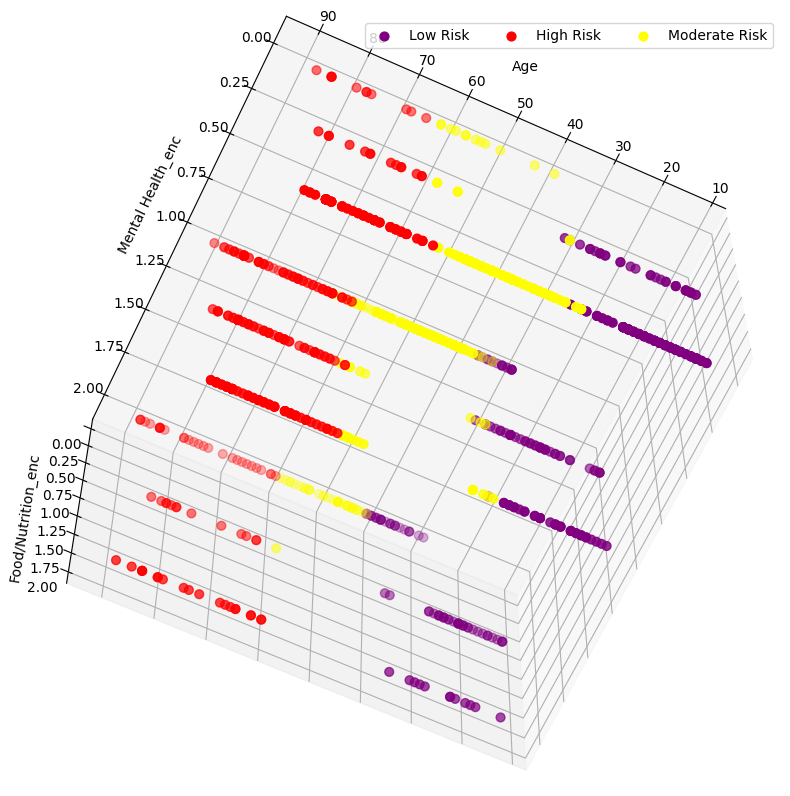

In [ ]:
def Plot3DData(data, column1, column2, column3):
  fig = plt.figure(figsize=(20,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter( data[column1][data.Cluster == 0], data[column2][data.Cluster == 0],data[column3][data.Cluster == 0],  c='purple', s=40, label="Low Risk")
  ax.scatter( data[column1][data.Cluster == 1], data[column2][data.Cluster == 1],data[column3][data.Cluster == 1],  c='red', s=40, label="High Risk")
  ax.scatter( data[column1][data.Cluster == 2], data[column2][data.Cluster == 2],data[column3][data.Cluster == 2],  c='yellow', s=40, label="Moderate Risk")
  ax.view_init(115, 115)
  plt.xlabel(column1)
  plt.ylabel(column2)
  ax.set_zlabel(column3 )

  ax.legend(ncol=3)
  plt.grid(b=True)
  plt.show()

print("KMeans plot")
Plot3DData(df_kmeans,  'Age', 'Mental Health_enc', 'Food/Nutrition_enc')

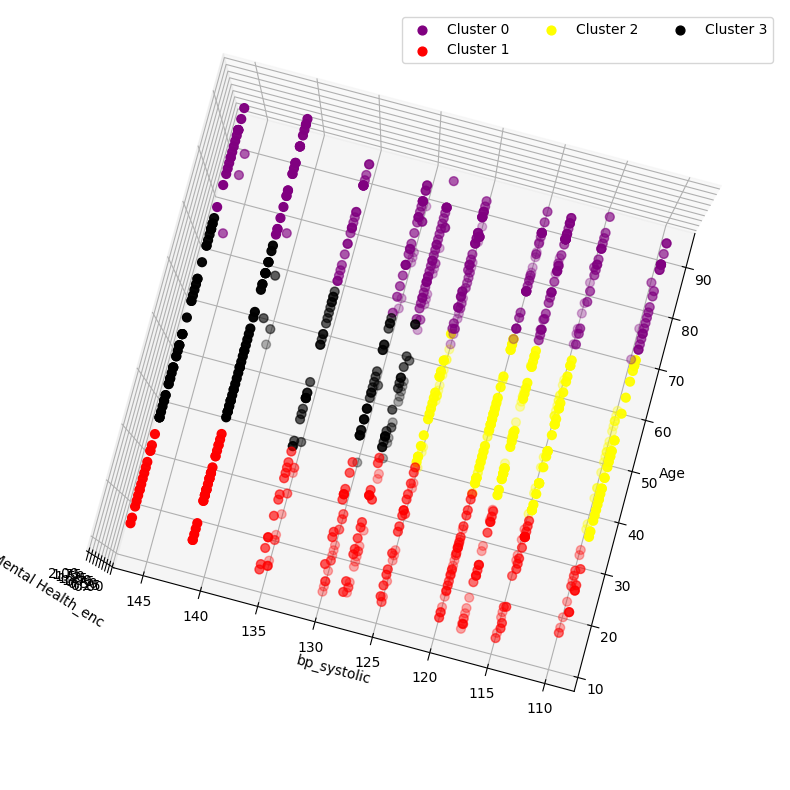

In [ ]:
Plot3DData(df_kmeans,  'Age', 'bp_systolic', 'Mental Health_enc')

In [ ]:
df_clusters = df.copy()
df_clusters.drop("Cluster", axis=1, inplace=True, errors='ignore')
df_clusters.insert(0, "Cluster", km.labels_, True)
df_clusters.head()

filename = "Results_RiskAssessment_Clusters.xlsx"
df_clusters.to_excel(filename)

<Axes: ylabel='count'>

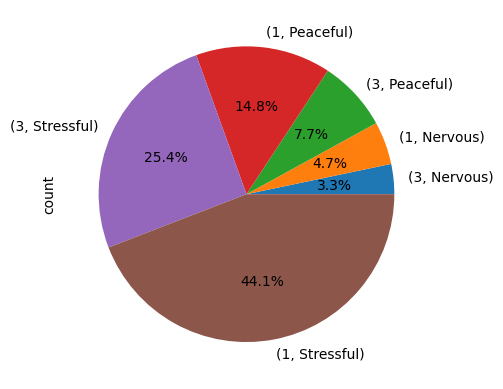

In [ ]:
df_clusters[df_clusters.Age >= 60][["Cluster", 'Mental Health']].value_counts().sort_values().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
# KMode

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2204.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 47, cost: 1903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 116, cost: 1543.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 116, cost: 1524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 121, cost: 1460.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 121, cost: 1440.0


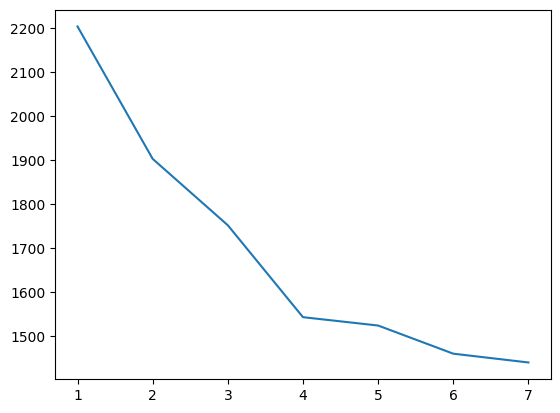

In [ ]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    clusters = kmode.fit_predict(X)
    cost.append(kmode.cost_)

y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [ ]:
df_cost = pd.DataFrame({"Cluster": y, "Cost": cost})
df_cost.head(10)

,Cluster,Cost
0,1,2204.0
1,2,1903.0
2,3,1752.0
3,4,1543.0
4,5,1524.0
5,6,1460.0
6,7,1440.0


In [ ]:
# Lets decide k = 4 from elbow
kmode = KModes(n_clusters= 3, init = "Cao", n_init = 1, verbose=1)
clusters = kmode.fit_predict(X_st)

df_kmode = df_prep.copy()
# delete cluster if exists
df_kmode.drop("Cluster", axis=1, inplace=True, errors='ignore')
df_kmode.insert(0, "Cluster", clusters, True)
# df_merged.drop("Cluster", axis=1)
df_kmode.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1752.0


,Cluster,Weight(lb),Age,Sleep hours per day,Work hours per day,Family History,Previous surgeries,bp_systolic,bp_diastolic,High_BP,Country Code_le,Gender_le,Medical Condition_le,Blood Group_le,Past Medications_le,Food/Nutrition_le,Mental Health_le,Physical Activity_le,Lifestyle_le,Health Risk_le
0,0,119,85,3,3,1,1,140,90,1,30,2,15,4,649,1,2,0,1,0
1,0,98,66,5,7,0,0,110,70,0,28,2,18,1,648,0,2,0,11,0
2,2,86,23,5,11,1,1,128,84,0,104,2,13,5,327,0,2,0,10,3
3,0,112,48,6,10,0,0,145,95,1,29,5,19,4,346,2,2,2,8,0
4,1,94,28,6,8,1,0,110,70,0,140,2,12,6,771,1,1,3,11,2


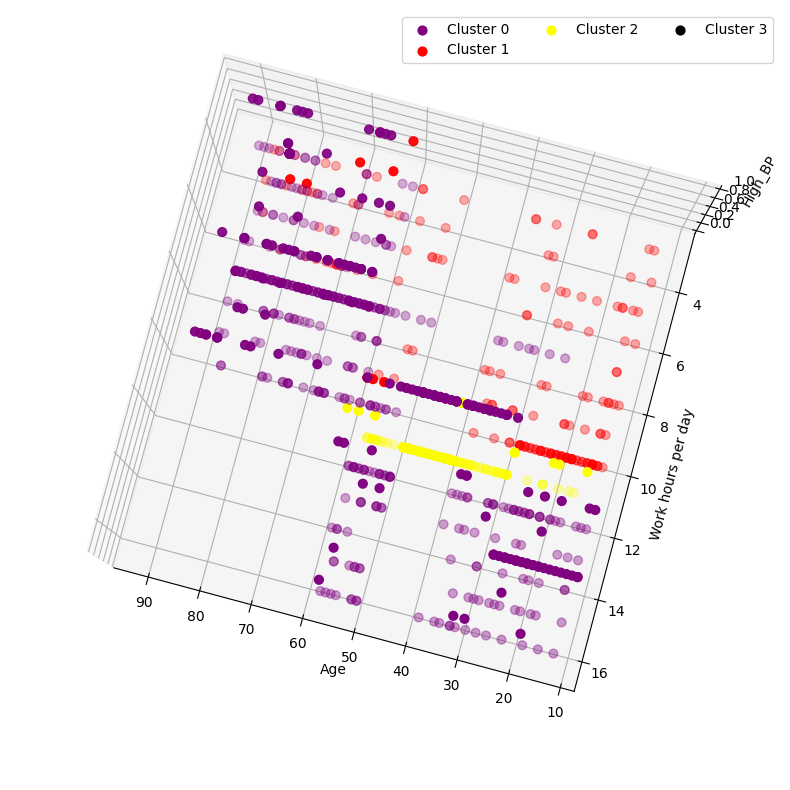

In [ ]:
Plot3DData(df_kmode, 'Age', 'Work hours per day', 'High_BP')

In [ ]:
df.drop("Cluster", axis=1, inplace=True, errors='ignore')
df.insert(0, "Cluster", km.labels_, True)
# df_merged.drop("Cluster", axis=1)
df.head()

,Cluster,PatientID,first_name,last_name,Country Code,Weight(lb),Gender,Medical Condition,Age,Blood Group,...,Past Medications,Food/Nutrition,Sleep hours per day,Work hours per day,Mental Health,Family History,Previous surgeries,Physical Activity,Lifestyle,Health Risk
0,1,7QF8HY7AN03,Marya,Bradock,CO,119,Female,migraine,85,B+,...,SyResp,Moderately Healthy,3,15,Stressful,True,True,Lightly Active,Former smoker,True
1,1,4PH6R91NW76,Krystalle,Shubotham,CM,98,Female,sprained ankle,66,A-,...,Supersmile,Healthy Diet,5,7,Stressful,False,False,Lightly Active,NaN,False
2,0,2PW1UE9YD24,Pen,Spennock,PH,86,Female,headache,23,B-,...,Hydrocodone Bitartrate and Acetaminophen,Healthy Diet,7,11,Peaceful,True,True,Lightly Active,Non-smoker,False
3,0,6PU0XR5VY14,Hubey,Adamowicz,CN,112,Male,stomach flu,48,B+,...,Imipramine Pamoate,Healthy Diet,6,8,Worried,False,False,Sedentary,Light drinker,True
4,1,7G92Y38YE04,Vally,Lindenstrauss,US,94,Female,food poisoning,28,O+,...,ibuprofen,Moderately Healthy,6,8,Stressful,True,True,Very Active,Heavy drinker,True


In [ ]:
df["Cluster"].value_counts()

Cluster
0    261
1    250
2    249
3    240
Name: count, dtype: int64

In [ ]:
df.groupby(['Cluster', "Health Risk"])["Health Risk"].count().sort_values()

Cluster  Health Risk
2        False          101
1        False          112
0        False          113
3        False          123
         True           126
1        True           138
2        True           139
0        True           148
Name: Health Risk, dtype: int64

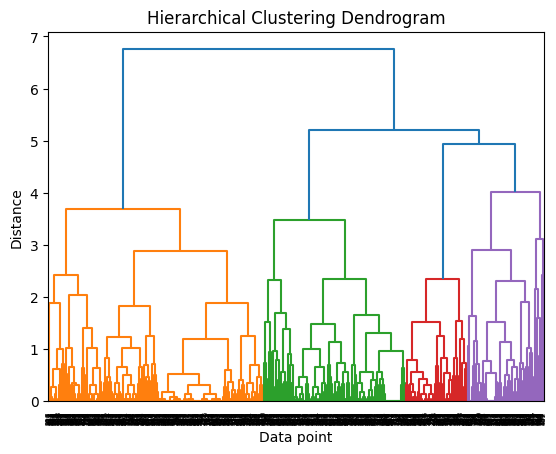

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
X = df_prep[['Age', 'Work hours per day', 'High_BP', 'Mental Health_le' ]]
st = StandardScaler()
X_st = st.fit_transform(X)


complete_clustering = linkage(X_st, method="complete", metric="euclidean")
# average_clustering = linkage(X_st, method="average", metric="euclidean")

# Perform hierarchical clustering
# Z = linkage(X_st, 'ward')

# Plot dendrogram
dendrogram(complete_clustering)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

In [ ]:
clustering = AgglomerativeClustering(n_clusters=4, linkage= "ward").fit(X_st)

# print the class labels
print(clustering.labels_)

[1 2 3 1 0 0 3 1 0 0 3 2 3 2 0 3 0 3 3 3 1 3 3 2 1 2 2 3 2 0 1 3 0 3 2 0 1
 0 0 3 3 2 0 2 3 0 1 3 2 1 0 0 1 3 3 3 2 1 0 2 0 3 2 3 1 2 1 0 3 3 1 2 3 1
 3 3 3 1 3 1 0 0 3 2 1 1 2 0 0 2 0 3 3 0 3 3 3 1 3 3 3 2 3 0 3 0 0 0 1 0 1
 0 0 0 0 1 2 3 0 1 3 1 0 0 2 2 2 0 1 1 2 2 3 0 2 3 0 2 3 3 1 3 1 1 3 3 3 0
 3 0 3 2 0 0 3 1 0 2 3 0 2 2 0 3 3 2 2 3 2 3 3 1 0 2 3 1 0 0 1 1 0 3 3 3 3
 3 1 2 0 2 2 2 1 3 1 1 2 0 0 3 3 3 3 2 0 2 2 1 1 1 1 1 0 3 2 1 1 1 1 3 2 3
 1 2 2 2 1 3 0 0 3 2 2 0 1 1 0 3 2 1 0 0 3 3 2 2 3 3 3 3 1 0 3 3 2 3 1 2 0
 3 0 3 1 3 0 3 0 0 0 2 1 1 3 1 3 2 3 2 3 2 2 2 0 1 1 0 0 2 1 0 1 2 1 3 3 1
 2 1 2 2 3 0 3 1 0 1 2 0 0 0 2 3 0 3 2 2 1 3 0 2 1 2 3 3 3 3 0 1 2 2 2 2 0
 3 2 1 0 3 1 0 3 2 2 2 1 3 0 3 0 3 1 2 0 0 1 2 2 1 1 0 0 0 3 3 1 2 3 0 2 2
 3 2 0 2 0 2 3 2 0 0 0 2 3 0 2 2 1 0 3 0 3 1 0 1 2 0 3 3 0 2 1 0 3 0 0 3 0
 2 1 1 0 3 3 0 1 2 2 3 1 0 2 2 3 2 2 3 3 3 3 3 0 2 1 0 3 0 3 3 3 0 1 0 3 1
 0 2 2 0 0 3 2 3 3 0 2 3 3 1 2 0 3 3 3 3 3 3 2 3 2 1 0 3 3 2 1 2 3 3 2 0 3
 3 3 2 1 3 3 0 1 2 2 2 0 

In [ ]:
df_hier = df_prep.copy()
# delete cluster if exists
df_hier.drop("Cluster", axis=1, inplace=True, errors='ignore')
df_hier.insert(0, "Cluster", clustering.labels_, True)
# df_merged.drop("Cluster", axis=1)
df_hier.head()

,Cluster,Weight(lb),Age,Sleep hours per day,Work hours per day,Family History,Previous surgeries,bp_systolic,bp_diastolic,High_BP,Country Code_le,Gender_le,Medical Condition_le,Blood Group_le,Past Medications_le,Food/Nutrition_le,Mental Health_le,Physical Activity_le,Lifestyle_le,Health Risk_le
0,1,119,85,3,3,1,1,140,90,1,30,2,15,4,649,1,2,0,1,0
1,2,98,66,5,7,0,0,110,70,0,28,2,18,1,648,0,2,0,11,0
2,3,86,23,5,11,1,1,128,84,0,104,2,13,5,327,0,2,0,10,3
3,1,112,48,6,10,0,0,145,95,1,29,5,19,4,346,2,2,2,8,0
4,0,94,28,6,8,1,0,110,70,0,140,2,12,6,771,1,1,3,11,2


Hierarchical Clustering With 3D Plot


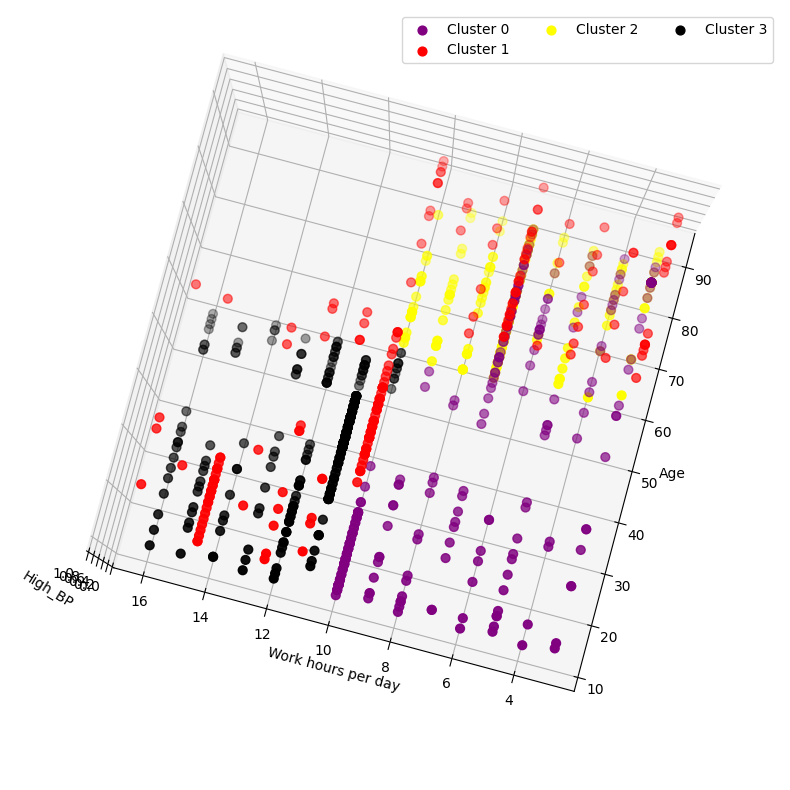

In [ ]:
print("Hierarchical Clustering With 3D Plot")
Plot3DData(df_hier, "Age", 'Work hours per day', 'High_BP')